# 1. Initialization

## 1.1. Initialize paths
    > Mount Google Drive
    > Set file paths (e.g. sensing data, EMA)

In [1]:
# init
#from google.colab import drive
#drive.mount('/content/drive')


from os.path import join as j
from os.path import sep
import numpy as np
import os

class Dirs:
    ROOT = 'root dir'

    # raw datasets
    RAW_LAB = 'initial lab'
    RAW_FIELD = 'initial field'
    RAW_FIELD_LEFTOVERS = 'initial field leftovers'

    # initial datasets (per participant)
    INIT_PARTICIPANTS = 'imported participants data'

    # splitting datasets
    SPLIT_TREADMILL_DATASET = 'unprocessed treadmill data'
    SPLIT_LAB_STRESS_DATASET = 'unprocessed lab stress data'
    SPLIT_FIELD_DATASET = 'unprocessed field stress data'

    # processed splitted datasets
    PROCESSED_TREADMILL_DATASET = 'processed treadmill data'
    PROCESSED_LAB_STRESS_DATASET = 'processed lab stress data'
    PROCESSED_FIELD_DATASET = 'processed field stress data'

    # filtered splitted datasets
    FILTERED_LAB_STRESS_DATASET = 'filtered lab stress data'
    FILTERED_FIELD_DATASET = 'filtered field stress data'

    # normalized splitted dataset
    NORMALIZED_LAB_STRESS_DATASET = 'normalized lab stress data'
    NORMALIZED_FIELD_DATASET = 'normalized field stress data'

    # dataset statistics
    STATS_ROOT = 'stats root'
    STATS_EMA_GRANULAR = 'granular ema stats'
    STATS_LAB_EMA = 'lab stress ema scores'
    STATS_LOCATION_ELBOW_CURVES = 'location k-means elbow curves'

    # personalized model's features
    FEATURES_LAB_STRESS = 'lab stress features'
    FEATURES_FIELD = 'field stress features'
    FEATURES_FIELD_WITH_CONTEXT = 'field (watch + context) features'
    FEATURES_FIELD_WITH_CONTEXT_MOTION_FILTER = 'field (watch + context) features with motion filter'
    FEATURES_FIELD_WITH_CONTEXT_LOOSENESS_FILTER = 'field (watch + stress) features with looseness filter'
    FEATURES_FIELD_WITH_CONTEXT_COMBINED_FILTER = 'field (watch + stress) features with combined filter'

    # results / accuracy
    RESULTS_ROOT = 'results'

    # thresholds
    THRESHOLDS_TREADMILL_OVERVIEW = 'treadmill values overview for thresholds'
    THRESHOLDS_MOTION = 'motion threshold results'
    THRESHOLDS_LOOSENESS = 'looseness threshold results'

    # ppg accuracy i.e. ppg vs. ecg
    PPG_ACCURACY_SUMMARY = 'ppg accuracy (ppg vs. ecg)'
    PPG_ACCURACY_DETAILED = 'ppg accuracy (ppg vs. ecg) detailed'

    # all keys
    keys = {
        ROOT,
        RAW_LAB,
        RAW_FIELD,
        RAW_FIELD_LEFTOVERS,
        INIT_PARTICIPANTS,
        SPLIT_TREADMILL_DATASET,
        SPLIT_LAB_STRESS_DATASET,
        SPLIT_FIELD_DATASET,
        PROCESSED_TREADMILL_DATASET,
        PROCESSED_LAB_STRESS_DATASET,
        PROCESSED_FIELD_DATASET,
        FILTERED_LAB_STRESS_DATASET,
        FILTERED_FIELD_DATASET,
        NORMALIZED_LAB_STRESS_DATASET,
        NORMALIZED_FIELD_DATASET,
        STATS_ROOT,
        STATS_EMA_GRANULAR,
        STATS_LAB_EMA,
        STATS_LOCATION_ELBOW_CURVES,
        FEATURES_LAB_STRESS,
        FEATURES_FIELD,
        FEATURES_FIELD_WITH_CONTEXT,
        FEATURES_FIELD_WITH_CONTEXT_MOTION_FILTER,
        FEATURES_FIELD_WITH_CONTEXT_LOOSENESS_FILTER,
        FEATURES_FIELD_WITH_CONTEXT_COMBINED_FILTER,
        RESULTS_ROOT,
        THRESHOLDS_TREADMILL_OVERVIEW,
        THRESHOLDS_MOTION,
        THRESHOLDS_LOOSENESS,
        PPG_ACCURACY_SUMMARY,
        PPG_ACCURACY_DETAILED
    }


class Files:
    # configuration files
    CONF_PARTICIPANT_IDS = 'participant ids'
    CONF_LAB_PROTOCOL = 'lab stress protocol'
    CONF_TREADMILL_PROTOCOL = 'treadmill protocol'

    # data files
    DATA_EMA = 'ema responses'

    # personalized model's results
    RESULTS_LAB_STRESS = 'lab stress results'
    RESULTS_FIELD_STRESS = 'field stress results'
    RESULTS_FIELD_WITH_CONTEXT = 'field (watch+context) stress results'
    RESULTS_FIELD_WITH_CONTEXT_MOTION_FILTER = 'field (watch+context) stress results with motion filter'
    RESULTS_FIELD_WITH_CONTEXT_LOOSENESS_FILTER = 'field (watch+context) stress results with looseness filter'
    RESULTS_FIELD_WITH_CONTEXT_COMBINED_FILTER = 'field (watch+context) stress results with combined filter'

    # generic model's results
    RESULTS_G_LAB_STRESS = 'generalized lab stress results'
    RESULTS_G_FIELD_STRESS = 'generalized field stress results'
    RESULTS_G_FIELD_WITH_CONTEXT = 'generalized field (watch+context) stress results'
    RESULTS_G_FIELD_WITH_CONTEXT_MOTION_FILTER = 'generalized field (watch+context) stress results with motion filter'
    RESULTS_G_FIELD_WITH_CONTEXT_LOOSENESS_FILTER = 'generalized field (watch+context) stress results with looseness filter'
    RESULTS_G_FIELD_WITH_CONTEXT_COMBINED_FILTER = 'generalized field (watch+context) stress results with combined filter'

    # all keys
    keys = {
        CONF_PARTICIPANT_IDS,
        CONF_LAB_PROTOCOL,
        CONF_TREADMILL_PROTOCOL,
        DATA_EMA,
        RESULTS_LAB_STRESS,
        RESULTS_FIELD_STRESS,
        RESULTS_FIELD_WITH_CONTEXT,
        RESULTS_FIELD_WITH_CONTEXT_MOTION_FILTER,
        RESULTS_FIELD_WITH_CONTEXT_LOOSENESS_FILTER,
        RESULTS_FIELD_WITH_CONTEXT_COMBINED_FILTER,
        RESULTS_G_LAB_STRESS,
        RESULTS_G_FIELD_STRESS,
        RESULTS_G_FIELD_WITH_CONTEXT,
        RESULTS_G_FIELD_WITH_CONTEXT_MOTION_FILTER,
        RESULTS_G_FIELD_WITH_CONTEXT_LOOSENESS_FILTER,
        RESULTS_G_FIELD_WITH_CONTEXT_COMBINED_FILTER,
    }


class Paths:
    _root = "/Users/kobiljon/Desktop/SOSW"
    _dirs = {
        Dirs.ROOT: _root,

        # initial dataset
        Dirs.RAW_LAB: j(_root, '0. raw dataset', 'lab_study_data'),
        Dirs.RAW_FIELD: j(_root, '0. raw dataset', 'field_sensing'),
        Dirs.RAW_FIELD_LEFTOVERS: j(_root, '0. raw dataset', 'field_sensing_leftovers'),

        # merging datasets
        Dirs.INIT_PARTICIPANTS: j(_root, '1. participant datasets'),

        # splitting datasets
        Dirs.SPLIT_TREADMILL_DATASET: j(_root, '2. three studies datasets', '1. ppg accuracy'),
        Dirs.SPLIT_LAB_STRESS_DATASET: j(_root, '2. three studies datasets', '2. lab stress'),
        Dirs.SPLIT_FIELD_DATASET: j(_root, '2. three studies datasets', '3. field stress'),

        # processed splitted datasets
        Dirs.PROCESSED_TREADMILL_DATASET: j(_root, '2.1. three studies datasets (processed)', '1. ppg accuracy'),
        Dirs.PROCESSED_LAB_STRESS_DATASET: j(_root, '2.1. three studies datasets (processed)', '2. lab stress'),
        Dirs.PROCESSED_FIELD_DATASET: j(_root, '2.1. three studies datasets (processed)', '3. field stress'),

        # filtered splitted datasets
        Dirs.FILTERED_LAB_STRESS_DATASET: j(_root, '2.2. three studies datasets (filtered)', '2. lab stress'),
        Dirs.FILTERED_FIELD_DATASET: j(_root, '2.2. three studies datasets (filtered)', '3. field stress'),

        # normalized splitted datasets
        Dirs.NORMALIZED_LAB_STRESS_DATASET: j(_root, '2.3. three studies datasets (normalized)', '2. lab stress'),
        Dirs.NORMALIZED_FIELD_DATASET: j(_root, '2.3. three studies datasets (normalized)', '3. field stress'),

        # dataset statistics
        Dirs.STATS_ROOT: j(_root, '3. dataset stats'),
        Dirs.STATS_EMA_GRANULAR: j(_root, '3. dataset stats', 'granular_ema_stats'),
        Dirs.STATS_LAB_EMA: j(_root, '3. dataset stats', 'lab_stress_ema_scores'),
        Dirs.STATS_LOCATION_ELBOW_CURVES: j(_root, '3. dataset stats', 'location_elbow_curves'),

        # features
        Dirs.FEATURES_LAB_STRESS: j(_root, '4. stress features', '1. lab stress'),
        Dirs.FEATURES_FIELD: j(_root, '4. stress features', '2. field stress'),
        Dirs.FEATURES_FIELD_WITH_CONTEXT: j(_root, '4. stress features', '3. field stress + context'),
        Dirs.FEATURES_FIELD_WITH_CONTEXT_MOTION_FILTER: j(_root, '4. stress features', '4. field stress + context + motion filter'),
        Dirs.FEATURES_FIELD_WITH_CONTEXT_LOOSENESS_FILTER: j(_root, '4. stress features', '5. field stress + context + looseness filter'),
        Dirs.FEATURES_FIELD_WITH_CONTEXT_COMBINED_FILTER: j(_root, '4. stress features', '6. field stress + context + combined filter'),

        # results / accuracy
        Dirs.RESULTS_ROOT: j(_root, '5. result'),

        # thresholds
        Dirs.THRESHOLDS_TREADMILL_OVERVIEW: j(_root, '6. threshold gridsearch results', '1. treadmill values overview'),
        Dirs.THRESHOLDS_MOTION: j(_root, '6. threshold gridsearch results', '2. motion threshold results'),
        Dirs.THRESHOLDS_LOOSENESS: j(_root, '6. threshold gridsearch results', '3. looseness threshold results'),

        # ppg accuracy i.e. ppg vs. ecg
        Dirs.PPG_ACCURACY_SUMMARY: j(_root, '7. ppg accuracy', '1. summary of differences'),
        Dirs.PPG_ACCURACY_DETAILED: j(_root, '7. ppg accuracy', '2. detailed differences'),
    }
    _files = {
        # configuration files
        Files.CONF_PARTICIPANT_IDS: j(_root, '0. raw dataset', 'participant_map.csv'),
        Files.CONF_LAB_PROTOCOL: j(_root, '0. raw dataset', 'lab_stress_protocol.csv'),
        Files.CONF_TREADMILL_PROTOCOL: j(_root, '0. raw dataset', 'ppg_accuracy_protocol.csv'),

        # data files
        Files.DATA_EMA: j(_root, '0. raw dataset', 'ema_responses.csv'),

        # personalized model's results / accuracy
        Files.RESULTS_LAB_STRESS: j(_root, '5. result', 'lab.csv'),
        Files.RESULTS_FIELD_STRESS: j(_root, '5. result', 'field.csv'),
        Files.RESULTS_FIELD_WITH_CONTEXT: j(_root, '5. result', 'field_context.csv'),
        Files.RESULTS_FIELD_WITH_CONTEXT_MOTION_FILTER: j(_root, '5. result', 'field_context_motion_filter.csv'),
        Files.RESULTS_FIELD_WITH_CONTEXT_LOOSENESS_FILTER: j(_root, '5. result', 'field_context_looseness_filter.csv'),
        Files.RESULTS_FIELD_WITH_CONTEXT_COMBINED_FILTER: j(_root, '5. result', 'field_context_combined_filter.csv'),

        Files.RESULTS_G_LAB_STRESS: j(_root, '5. result', 'lab_generalized.csv'),
        Files.RESULTS_G_FIELD_STRESS: j(_root, '5. result', 'field_generalized.csv'),
        Files.RESULTS_G_FIELD_WITH_CONTEXT: j(_root, '5. result', 'field_generalized_context.csv'),
        Files.RESULTS_G_FIELD_WITH_CONTEXT_MOTION_FILTER: j(_root, '5. result', 'field_generalized_context_motion_filter.csv'),
        Files.RESULTS_G_FIELD_WITH_CONTEXT_LOOSENESS_FILTER: j(_root, '5. result', 'field_generalized_context_looseness_filter.csv'),
        Files.RESULTS_G_FIELD_WITH_CONTEXT_COMBINED_FILTER: j(_root, '5. result', 'field_generalized_context_combined_filter.csv'),
    }

    @staticmethod
    def get(key, *attach: str):
        if key in Dirs.keys:
            if attach:
                return j(Paths._dirs[key], f'{sep}'.join(attach))
            else:
                return Paths._dirs[key]
        elif key in Files.keys:
            return Paths._files[key]
        else:
            return None

print('Paths initialized -- filesystem ready --')

Paths initialized -- filesystem ready --


## 1.2. Utility functions
    > Loading data file
    > Selecting portion of data
    > Binary search for filters

In [2]:
def load_dataset(path, cast_type=float, single_column=True, sort=True):
    _res = []
    with open(path) as _r:
        if single_column:
            for _line in _r:
                _ts, _val = _line[:-1].split(',')
                try:
                    _ts, _val = int(_ts), cast_type(_val)
                except ValueError:
                    continue
                _res += [(_ts, _val)]
        else:
            for _line in _r:
                _cells = _line[:-1].split(',')
                try:
                    _ts = int(_cells[0])
                    _values = tuple(cast_type(_x) for _x in _cells[1:])
                except ValueError:
                    continue
                _res += [(_ts,) + _values]
    if sort:
        _res.sort(key=lambda e: e[0])
    return _res


def bin_find(dataset, low, high, ts, go_up):
    if high > low:
        mid = (high + low) // 2
        if dataset[mid][0] == ts:
            return mid
        elif dataset[mid][0] > ts:
            return bin_find(dataset, low, mid, ts, go_up)
        else:
            return bin_find(dataset, mid + 1, high, ts, go_up)
    else:
        return max(high, low) if go_up else min(high, low)


def select_data(dataset, from_ts, till_ts, with_timestamp=False, threshold=None):
    _res = []
    _idx0 = bin_find(dataset, 0, len(dataset) - 1, from_ts, go_up=False)
    _idx1 = len(dataset)
    while _idx0 < _idx1:
        _ts = dataset[_idx0][0]
        if from_ts <= _ts < till_ts:
            if with_timestamp:
                _res += [dataset[_idx0]]
            else:
                _cells = dataset[_idx0][1:]
                _res += [_cells if len(_cells) > 1 else _cells[0]]
        elif _ts >= till_ts:
            break
        _idx0 += 1
    return _res if not threshold or len(_res) >= threshold else None

## 1.3. Initialize study configs
    > Feature selection
    > Sliding window size
    > Sliding window overlap
    > M_ROUNDS for building personalized models
    > EMA span for data augmentation

In [3]:
!pip install hrv-analysis
#!pip install shap==0.36.0


class Labels:
    LABEL_STRESSED = 'stressed'
    LABEL_NOT_STRESSED = 'not-stressed'
    STR_LABELS = [LABEL_STRESSED, LABEL_NOT_STRESSED]

    LABEL_STRESSED_INT = 1
    LABEL_NOT_STRESSED_INT = 0
    INT_LABELS = [LABEL_STRESSED_INT, LABEL_NOT_STRESSED_INT]


class Features:
    CONTEXT_ONLY = ['activity', 'location', 'is_weekday']
    CATEGORICAL = ['activity', 'location']

    WATCH_BASIC = ['mean_nni', 'sdnn', 'rmssd', 'nni_50', 'mean_hr', 'std_hr', 'lf', 'hf', 'lf_hf_ratio', 'sd1', 'sd2', 'sampen']
    WATCH_ALL = ['mean_nni', 'sdnn', 'rmssd', 'nni_50', 'mean_hr', 'std_hr', 'sdsd', 'median_nni', 'pnni_50', 'nni_20', 'pnni_20', 'range_nni', 'cvsd', 'cvnni', 'max_hr', 'min_hr', 'lf', 'hf', 'total_power', 'vlf', 'csi', 'cvi', 'modified_csi', 'sd1', 'sd2', 'ratio_sd2_sd1', 'sampen']
    # WATCH_ALL = ['hr_mean', 'hr_median', 'hr_max', 'hr_min', 'hr_std', 'hr_kurtosis', 'hr_skew', 'hr_80', 'hr_20', 'rr_mean', 'rr_median', 'rr_max', 'rr_min', 'rr_std', 'rr_kurtosis', 'rr_skew', 'rr_80', 'rr_20', 'rr_rmssd']
    WATCH_AND_CONTEXT = ['mean_nni', 'sdnn', 'rmssd', 'nni_50', 'mean_hr', 'std_hr', 'lf', 'hf', 'lf_hf_ratio', 'sd1', 'sd2', 'sampen', 'activity', 'location', 'hour', 'is_weekday']
    WATCH_AND_CONTEXT_NO_LOCATION = ['mean_nni', 'sdnn', 'rmssd', 'nni_50', 'mean_hr', 'std_hr', 'lf', 'hf', 'lf_hf_ratio', 'sd1', 'sd2', 'sampen', 'activity', 'hour', 'is_weekday']

    ALL = ['mean_nni', 'sdnn', 'rmssd', 'nni_50', 'mean_hr', 'std_hr', 'sdsd', 'median_nni', 'pnni_50', 'nni_20', 'pnni_20', 'range_nni', 'cvsd', 'cvnni', 'max_hr', 'min_hr', 'lf', 'hf', 'lf_hf_ratio', 'total_power', 'vlf', 'lfnu', 'hfnu', 'csi', 'cvi', 'modified_csi', 'triangular_index', 'sd1', 'sd2', 'ratio_sd2_sd1', 'sampen', 'activity', 'location', 'hour', 'is_weekday']


class Configs:
    # region previous thresholds
    # MOTION_THRESHOLDS_RANGE = np.array(range(20, 110, 5)) / 10
    # LOOSENESS_THRESHOLDS_RANGE = np.array(range(187, 348, 10)) * 1000
    # MOTION_THRESHOLDS = {
    #     '12170603@inha.edu': 10.5,
    #     '12181157@inha.edu': 7,
    #     '12201686@inha.edu': 9.5,
    #     '12212982so@inha.edu': 10,
    #     'as7177as3912@gmail.com': 8.5,
    #     'bagle1029@gmail.com': 9.5,
    #     'bw04029@gmail.com': 6,
    #     'chaewoni65@gmail.com': 2,
    #     'csissis1997@gmail.com': 3,
    #     'david000914@gmail.com': 5,
    #     'duecjf011521212106@gmail.com': 2.5,
    #     'eowjdtjdwls@gmail.com': 3.5,
    #     'fpdlsqhdn962@inha.edu': 2,
    #     'gh011127@gmail.com': 9,
    #     'gurwns7772@gmail.com': 2,
    #     'hhcc05@inha.edu': 3,
    #     'jinsoonshim@naver.com': 7,
    #     'jwshoho4@gmail.com': 8.5,
    #     'jyypaul@gmail.com': 5.5,
    #     'km55181499@gmail.com': 7,
    #     'kpm1323@gmail.com': 2.5,
    #     'memm1439@gmail.com': 4.5,
    #     'minjae20000207@gmail.com': 6.5,
    #     'minrudcho01@gmail.com': 4,
    #     'nigaram8@gmail.com': 7,
    #     'nnozilaxonim@gmail.com': 10.5,
    #     'powerampshere@gmail.com': 3,
    #     'rlarkgus11170@inha.edu': 7.5,
    #     'unicpn21@gmail.com': 3.5,
    #     'vusgowlwk17@gmail.com': 7,
    #     'wjdwogus0604@gmail.com': 5.5,
    #     'wonjs0725@gmail.com': 5,
    #     'zkapdh123@gmail.com': 2.5
    # }
    # LOOSENESS_THRESHOLDS = {
    #     '12170603@inha.edu': 237000,
    #     '12181157@inha.edu': 297000,
    #     '12212982so@inha.edu': 327000,
    #     'as7177as3912@gmail.com': 277000,
    #     'bagle1029@gmail.com': 267000,
    #     'bw04029@gmail.com': 187000,
    #     'chaewoni65@gmail.com': 327000,
    #     'csissis1997@gmail.com': 247000,
    #     'david000914@gmail.com': 317000,
    #     'duecjf011521212106@gmail.com': 247000,
    #     'eowjdtjdwls@gmail.com': 237000,
    #     'fpdlsqhdn962@inha.edu': 187000,
    #     'gh011127@gmail.com': 217000,
    #     'gurwns7772@gmail.com': 277000,
    #     'hhcc05@inha.edu': 237000,
    #     'jinsoonshim@naver.com': 297000,
    #     'jwshoho4@gmail.com': 347000,
    #     'jyypaul@gmail.com': 197000,
    #     'km55181499@gmail.com': 287000,
    #     'kpm1323@gmail.com': 247000,
    #     'memm1439@gmail.com': 317000,
    #     'minjae20000207@gmail.com': 277000,
    #     'minrudcho01@gmail.com': 247000,
    #     'nigaram8@gmail.com': 347000,
    #     'nnozilaxonim@gmail.com': 307000,
    #     'powerampshere@gmail.com': 267000,
    #     'rlarkgus11170@inha.edu': 237000,
    #     'unicpn21@gmail.com': 267000,
    #     'vusgowlwk17@gmail.com': 227000,
    #     'wjdwogus0604@gmail.com': 227000,
    #     'wonjs0725@gmail.com': 267000,
    #     'zkapdh123@gmail.com': 287000
    # }
    # endregion

    MOTION_THRESHOLDS_RANGE = np.array(range(20, 60, 2)) / 10
    LOOSENESS_THRESHOLDS_RANGE = np.array(range(180, 300, 6)) * 1000
    MOTION_THRESHOLDS = {
        '12170603@inha.edu': 3.2,
        '12181157@inha.edu': 4.6,
        '12201686@inha.edu': 2.8,
        '12212982so@inha.edu': 4.2,
        'as7177as3912@gmail.com': 4.4,
        'bagle1029@gmail.com': 4.8,
        'bw04029@gmail.com': 3.6,
        'chaewoni65@gmail.com': 2.2,
        'csissis1997@gmail.com': 2.6,
        'david000914@gmail.com': 3.2,
        'duecjf011521212106@gmail.com': 5.2,
        'eowjdtjdwls@gmail.com': 3.6,
        'fpdlsqhdn962@inha.edu': 5.8,
        'gh011127@gmail.com': 5.8,
        'gurwns7772@gmail.com': 5.0,
        'hhcc05@inha.edu': 2.0,
        'jinsoonshim@naver.com': 3.6,
        'jwshoho4@gmail.com': 2.0,
        'jyypaul@gmail.com': 4.8,
        'km55181499@gmail.com': 3.0,
        'kpm1323@gmail.com': 2.2,
        'memm1439@gmail.com': 2.8,
        'minjae20000207@gmail.com': 2.8,
        'minrudcho01@gmail.com': 4.8,
        'nigaram8@gmail.com': 5.2,
        'nnozilaxonim@gmail.com': 2.0,
        'powerampshere@gmail.com': 4.0,
        'rlarkgus11170@inha.edu': 5.8,
        'unicpn21@gmail.com': 2.0,
        'vusgowlwk17@gmail.com': 3.2,
        'wjdwogus0604@gmail.com': 2.4,
        'wonjs0725@gmail.com': 5.2,
        'zkapdh123@gmail.com': 3.4
    }
    LOOSENESS_THRESHOLDS = {
        '12170603@inha.edu': 204000,
        '12181157@inha.edu': 258000,
        '12212982so@inha.edu': 180000,
        'as7177as3912@gmail.com': 288000,
        'bagle1029@gmail.com': 198000,
        'bw04029@gmail.com': 216000,
        'chaewoni65@gmail.com': 204000,
        'csissis1997@gmail.com': 276000,
        'david000914@gmail.com': 180000,
        'duecjf011521212106@gmail.com': 198000,
        'eowjdtjdwls@gmail.com': 288000,
        'fpdlsqhdn962@inha.edu': 234000,
        'gh011127@gmail.com': 246000,
        'gurwns7772@gmail.com': 210000,
        'hhcc05@inha.edu': 222000,
        'jinsoonshim@naver.com': 180000,
        'jwshoho4@gmail.com': 222000,
        'jyypaul@gmail.com': 294000,
        'km55181499@gmail.com': 276000,
        'kpm1323@gmail.com': 210000,
        'memm1439@gmail.com': 264000,
        'minjae20000207@gmail.com': 276000,
        'minrudcho01@gmail.com': 282000,
        'nigaram8@gmail.com': 210000,
        'nnozilaxonim@gmail.com': 222000,
        'powerampshere@gmail.com': 282000,
        'rlarkgus11170@inha.edu': 288000,
        'unicpn21@gmail.com': 210000,
        'vusgowlwk17@gmail.com': 216000,
        'wjdwogus0604@gmail.com': 252000,
        'wonjs0725@gmail.com': 222000,
        'zkapdh123@gmail.com': 228000
    }

    M_ROUNDS = 30

    # time unit: milliseconds
    WINDOW_SIZE = 60 * 1000
    WINDOW_OVERLAP = 0.75
    MIN_WINDOW_SAMPLES = 60
    EMA_SPAN = 30 * 60 * 1000

# 2. Data processing pipeline

## 2.1. Clean HR signals
    > Motion and looseness filters
    > Obvious errors by PPG sensor
    > Outlier HR readings

### 2.1.1 Copying untouched data (done)

In [9]:
from shutil import copyfile as cp
from os import listdir as ld
import os
os.system(f'find {Paths.get(Dirs.ROOT)} -name ".DS_Store" -delete')


# normal copy with exists() check
def copy_file(src_path, dst_path):
  if os.path.exists(src_path):
    if os.path.exists(dst_path):
      os.remove(dst_path)
    cp(src_path, dst_path)


'''
(STEP 1)
  Copy Lab-Stress and PPG-Accuracy datasets
  parent_dir / scenario / participant / data
'''
datasets = [
  ('lab stress', Dirs.SPLIT_LAB_STRESS_DATASET, Dirs.PROCESSED_LAB_STRESS_DATASET),
  ('ppg accuracy', Dirs.SPLIT_TREADMILL_DATASET, Dirs.PROCESSED_TREADMILL_DATASET)
]
for title, src_dataset_key, dst_dataset_key in datasets:
  print(title)
  scenarios = ld(Paths.get(src_dataset_key))
  scenarios.remove('.DS_Store')
  scenarios.sort(key=lambda x: int(x[:x.index('.')]))
  for scenario in scenarios:
    print(f'\t{scenario}')
    # path check
    if not os.path.exists(Paths.get(dst_dataset_key, scenario)):
      os.mkdir(Paths.get(dst_dataset_key, scenario))
    
    for participant in ld(Paths.get(src_dataset_key, scenario)):
      # path check
      if not os.path.exists(Paths.get(dst_dataset_key, scenario, participant)):
          os.mkdir(Paths.get(dst_dataset_key, scenario, participant))

      # copy other files (i.e. ecg_hr, ecg_rr, ppg_li)
      for filename in ['acc', 'ppg_hr', 'ppg_rr', 'ecg_hr', 'ecg_rr', 'ppg_li']:
        src_path = Paths.get(src_dataset_key, scenario, participant, f'{filename}.csv')
        dst_path = Paths.get(dst_dataset_key, scenario, participant, f'{filename}.csv')
        copy_file(src_path, dst_path)

      # remove this after ecg check
      for filename in ['ecg_hr', 'ecg_rr']:
        src_path = Paths.get(src_dataset_key, scenario, participant, f'{filename}.csv')
        dst_path = Paths.get(dst_dataset_key, scenario, participant, f'{filename.replace("ecg", "ppg")}.csv')
        copy_file(src_path, dst_path)


'''
(STEP 2)
  Copy field stress dataset
  parent_dir / participant / data
'''
print('field stress')
participants = ld(Paths.get(Dirs.SPLIT_FIELD_DATASET))
for idx, participant in enumerate(participants):
  print(f'\t {idx+1}/{len(participants)} {participant}')

  # path check
  if not os.path.exists(Paths.get(Dirs.PROCESSED_FIELD_DATASET, participant)):
      os.mkdir(Paths.get(Dirs.PROCESSED_FIELD_DATASET, participant))

  # copy other files (i.e. ecg_hr, ecg_rr, ppg_li)
  for filename in ['ppg_hr', 'ppg_rr', 'acc', 'ppg_li']:
    src_path = Paths.get(Dirs.SPLIT_FIELD_DATASET, participant, f'{filename}.csv')
    dst_path = Paths.get(Dirs.PROCESSED_FIELD_DATASET, participant, f'{filename}.csv')
    copy_file(src_path, dst_path)


lab stress
	1. baseline rest
	2. speech instructions
	3. speech preparation
	4. speech stressor
	5. rest
	6. arithmetic instructions
	7. arithmetic stressor p1
	8. arithmetic rest
	9. arithmetic stressor p2
	10. rest
	11. cold instructions
	12. cold stressor
	13. recovery
ppg accuracy
	1. static tight
	2. static medium
	3. static loose
	4. walking tight
	5. walking medium
	6. walking loose
	7. running tight
	8. running medium
	9. running loose
field stress
	 1/36 jinsoonshim@naver.com
	 2/36 kpm1323@gmail.com
	 3/36 minrudcho01@gmail.com
	 4/36 fpdlsqhdn962@inha.edu
	 5/36 csissis1997@gmail.com
	 6/36 .DS_Store
	 7/36 chaewoni65@gmail.com
	 8/36 eowjdtjdwls@gmail.com
	 9/36 rlarkgus11170@inha.edu
	 10/36 12201686@inha.edu
	 11/36 km55181499@gmail.com
	 12/36 bw04029@gmail.com
	 13/36 vusgowlwk17@gmail.com
	 14/36 rbfl675@inha.edu
	 15/36 minjae20000207@gmail.com
	 16/36 jwshoho4@gmail.com
	 17/36 duecjf011521212106@gmail.com
	 18/36 12212982so@inha.edu
	 19/36 nigaram8@gmail.com
	 20/3

### 2.1.1. Human HR range (counter done)

In [11]:
from shutil import copyfile as cp
from os import listdir as ld
import os
os.system(f'find {Paths.get(Dirs.ROOT)} -name ".DS_Store" -delete')


# checks HR via range
def process_hr_file(path):
  if os.path.exists(path):
    with open(path, 'r') as r:
      lines = r.readlines()
      l_ = len(lines)
    with open(path, 'w+') as w:
      for line in lines:
        ts, hr = line[:-1].split(',')
        try:
          if 30 <= int(hr) <= 220:
            w.write(line)
            l_-=1
        except ValueError:
          pass
    return l_ #the number of dropped hr lines
  else:
    return 0                       


# checks HR-interval via range
def process_rr_file(path):
  if os.path.exists(path):
    with open(path, 'r') as r:
      lines = r.readlines()
      l_ = len(lines)
    with open(path, 'w+') as w:
      for line in lines:
        ts, rri = line[:-1].split(',')
        try:
          if 272 <= int(rri) <= 2000:
            w.write(line)
            l_-=1
        except ValueError:
          pass
    return l_ #the number of dropped rr lines
  else:
    return 0


'''
(STEP 1)
  Cleaning Lab-Stress and PPG-Accuracy datasets
  parent_dir / scenario / participant / data
'''
datasets = [
  ('lab stress', Dirs.PROCESSED_LAB_STRESS_DATASET),
  #('ppg accuracy', Dirs.PROCESSED_TREADMILL_DATASET)
]
for title, dataset_key in datasets:
  t_n_ppg_hr = t_n_ecg_hr = t_n_ppg_rr = t_n_ecg_rr = 0
  print("\n",title)
  scenarios = ld(Paths.get(dataset_key))
  scenarios.remove('.DS_Store')
  scenarios.sort(key=lambda x: int(x[:x.index('.')]))
  for scenario in scenarios:
    print(f'\t{scenario}')
    for participant in ld(Paths.get(dataset_key, scenario)):
      # (a) fix heart rate (bpm)
      path = Paths.get(dataset_key, scenario, participant, 'ppg_hr.csv')
      n_ppg_hr = process_hr_file(path)
      t_n_ppg_hr += n_ppg_hr
      path = Paths.get(dataset_key, scenario, participant, 'ecg_hr.csv')
      n_ecg_hr = process_hr_file(path)
      t_n_ecg_hr += n_ecg_hr

      # (b) fix interbeat-intervals (ms)
      path = Paths.get(dataset_key, scenario, participant, 'ppg_rr.csv')
      n_ppg_rr = process_rr_file(path)
      t_n_ppg_rr += n_ppg_rr
      path = Paths.get(dataset_key, scenario, participant, 'ecg_rr.csv')
      n_ecg_rr = process_rr_file(path)
      t_n_ecg_rr += n_ecg_rr
  print("# of dropped lines (ppg_hr, ecg_hr, ppg_rr, ecg_rr)", t_n_ppg_hr, t_n_ecg_hr, t_n_ppg_rr, t_n_ecg_rr)

'''
(STEP 2)
  Cleaning field stress dataset
  parent_dir / participant / data
'''
print('\nfield stress')
t_n_ppg_hr = t_n_ppg_rr = 0
participants = ld(Paths.get(Dirs.PROCESSED_FIELD_DATASET))
for idx, participant in enumerate(participants):
  print(f'\t {idx+1}/{len(participants)} {participant}', end = ' ')

  # (a) fix heart rate (bpm)
  path = Paths.get(Dirs.PROCESSED_FIELD_DATASET, participant, 'ppg_hr.csv')
  n_ppg_hr = process_hr_file(path)
  print(f'({n_ppg_hr} hrs removed, ', end='')
  t_n_ppg_hr += n_ppg_hr

  # (b) fix interbeat-intervals (ms)
  path = Paths.get(Dirs.PROCESSED_FIELD_DATASET, participant, 'ppg_rr.csv')
  n_ppg_rr = process_rr_file(path)
  print(f'{n_ppg_rr} rrs removed)')
  t_n_ppg_rr += n_ppg_rr
print("# of dropped lines (ppg_hr, ppg_rr):", t_n_ppg_hr, t_n_ppg_rr)



 lab stress
	1. baseline rest
	2. speech instructions
	3. speech preparation
	4. speech stressor
	5. rest
	6. arithmetic instructions
	7. arithmetic stressor p1
	8. arithmetic rest
	9. arithmetic stressor p2
	10. rest
	11. cold instructions
	12. cold stressor
	13. recovery
# of dropped lines (ppg_hr, ecg_hr, ppg_rr, ecg_rr) 0 0 20 20

field stress
	 1/36 jinsoonshim@naver.com (0 hrs removed, 72 rrs removed)
	 2/36 kpm1323@gmail.com (109741 hrs removed, 26885 rrs removed)
	 3/36 minrudcho01@gmail.com (406871 hrs removed, 64804 rrs removed)
	 4/36 fpdlsqhdn962@inha.edu (137273 hrs removed, 30072 rrs removed)
	 5/36 csissis1997@gmail.com (311840 hrs removed, 266828 rrs removed)
	 6/36 .DS_Store (0 hrs removed, 0 rrs removed)
	 7/36 chaewoni65@gmail.com (347712 hrs removed, 22463 rrs removed)
	 8/36 eowjdtjdwls@gmail.com (735038 hrs removed, 217283 rrs removed)
	 9/36 rlarkgus11170@inha.edu (206753 hrs removed, 34759 rrs removed)
	 10/36 12201686@inha.edu (0 hrs removed, 4 rrs removed)
	 

### 2.1.2. Outlier trimming

In [12]:
from scipy.stats import median_absolute_deviation
from shutil import copyfile as cp
from os import listdir as ld
import numpy as np
import os
os.system(f'find {Paths.get(Dirs.ROOT)} -name ".DS_Store" -delete')


# checks via 3*MAD range
def process_hr_file(path):
  if os.path.exists(path):
    with open(path, 'r') as r:
      hrs = []
      lines = []
      for line in r:
          cells = line[:-1].split(' ')
          if len(cells) == 2:
            hr = cells[1]
            if hr.isdigit():
                hrs += [int(hr)]
                lines += [line]
      l_ = len(lines)
    
    if len(hrs) == 0:
      return 0

    trim_min = np.median(hrs) - 3 * median_absolute_deviation(hrs)
    trim_max = np.median(hrs) + 3 * median_absolute_deviation(hrs)
    
    with open(path, 'w+') as w:
      for line in lines:
        ts, hr = line[:-1].split(',')
        try:
          if trim_min <= int(hr) <= trim_max:
            w.write(line)
            l_-=1
        except ValueError:
          pass
    return l_ #the number of dropped hr lines
  else:
    return 0                       


# checks via 3*MAD range
def process_rr_file(path):
  if os.path.exists(path):
    with open(path, 'r') as r:
      rr_intervals = []
      lines = []
      for line in r:
          cells = line[:-1].split(' ')
          if len(cells) == 2:
            rr = cells[1]
            if rr.isdigit():
                rr_intervals += [int(rr)]
                lines += [line]
      l_ = len(lines)
    
    if len(rr_intervals) == 0:
      return 0

    trim_min = np.median(rr_intervals) - 3 * median_absolute_deviation(rr_intervals)
    trim_max = np.median(rr_intervals) + 3 * median_absolute_deviation(rr_intervals)

    with open(path, 'w+') as w:
      for line in lines:
        ts, rri = line[:-1].split(',')
        try:
          if trim_min <= int(rri) <= trim_max:
            w.write(line)
            l_-=1
        except ValueError:
          pass
    return l_ #the number of dropped rr lines
  else:
    return 0


'''
(STEP 1)
  Cleaning Lab-Stress and PPG-Accuracy datasets
  parent_dir / scenario / participant / data
'''
datasets = [
  ('lab stress', Dirs.PROCESSED_LAB_STRESS_DATASET),
  #('ppg accuracy', Dirs.PROCESSED_TREADMILL_DATASET)
]
t_n_ppg_hr = t_n_ppg_rr = 0
for title, dataset_key in datasets:
  t_n_ppg_hr = t_n_ecg_hr = t_n_ppg_rr = t_n_ecg_rr = 0
  print("\n",title)
  scenarios = ld(Paths.get(dataset_key))
  scenarios.remove('.DS_Store')
  scenarios.sort(key=lambda x: int(x[:x.index('.')]))
  for scenario in scenarios:
    print(f'\t{scenario}')
    for participant in ld(Paths.get(dataset_key, scenario)):
      # (a) fix heart rate (bpm)
      path = Paths.get(dataset_key, scenario, participant, 'ppg_hr.csv')
      n_ppg_hr = process_hr_file(path)
      t_n_ppg_hr += n_ppg_hr
      path = Paths.get(dataset_key, scenario, participant, 'ecg_hr.csv')
      n_ecg_hr = process_hr_file(path)
      t_n_ecg_hr += n_ecg_hr

      # (b) fix interbeat-intervals (ms)
      path = Paths.get(dataset_key, scenario, participant, 'ppg_rr.csv')
      n_ppg_rr = process_rr_file(path)
      t_n_ppg_rr += n_ppg_rr
      path = Paths.get(dataset_key, scenario, participant, 'ecg_rr.csv')
      n_ecg_rr = process_rr_file(path)
      t_n_ecg_rr += n_ecg_rr
  print("# of dropped lines (ppg_hr, ecg_hr, ppg_rr, ecg_rr)", t_n_ppg_hr, t_n_ecg_hr, t_n_ppg_rr, t_n_ecg_rr)

'''
(STEP 2)
  Cleaning field stress dataset
  parent_dir / participant / data
'''
print('\nfield stress')
t_n_ppg_hr = t_n_ppg_rr = 0
participants = ld(Paths.get(Dirs.PROCESSED_FIELD_DATASET))
for idx, participant in enumerate(participants):
  print(f'\t {idx+1}/{len(participants)} {participant}')

  # (a) fix heart rate (bpm)
  path = Paths.get(Dirs.PROCESSED_FIELD_DATASET, participant, 'ppg_hr.csv')
  n_ppg_hr = process_hr_file(path)
  t_n_ppg_hr += n_ppg_hr

  # (b) fix interbeat-intervals (ms)
  path = Paths.get(Dirs.PROCESSED_FIELD_DATASET, participant, 'ppg_rr.csv')
  n_ppg_rr = process_rr_file(path)
  t_n_ppg_rr += n_ppg_rr
print("# of dropped lines (ppg_hr, ppg_rr):", t_n_ppg_hr, t_n_ppg_rr)



 lab stress
	1. baseline rest
	2. speech instructions
	3. speech preparation
	4. speech stressor
	5. rest
	6. arithmetic instructions
	7. arithmetic stressor p1
	8. arithmetic rest
	9. arithmetic stressor p2
	10. rest
	11. cold instructions
	12. cold stressor
	13. recovery
# of dropped lines (ppg_hr, ecg_hr, ppg_rr, ecg_rr) 0 0 0 0

field stress
	 1/36 jinsoonshim@naver.com
	 2/36 kpm1323@gmail.com
	 3/36 minrudcho01@gmail.com
	 4/36 fpdlsqhdn962@inha.edu
	 5/36 csissis1997@gmail.com
	 6/36 .DS_Store
	 7/36 chaewoni65@gmail.com
	 8/36 eowjdtjdwls@gmail.com
	 9/36 rlarkgus11170@inha.edu
	 10/36 12201686@inha.edu
	 11/36 km55181499@gmail.com
	 12/36 bw04029@gmail.com
	 13/36 vusgowlwk17@gmail.com
	 14/36 rbfl675@inha.edu
	 15/36 minjae20000207@gmail.com
	 16/36 jwshoho4@gmail.com
	 17/36 duecjf011521212106@gmail.com
	 18/36 12212982so@inha.edu
	 19/36 nigaram8@gmail.com
	 20/36 12181157@inha.edu
	 21/36 as7177as3912@gmail.com
	 22/36 nnozilaxonim@gmail.com
	 23/36 powerampshere@gmail.co

### 2.1.3. Motion filter

#### (a) Initial cleanup

In [ ]:
# initial cleanup
from os import listdir as ld
import os
os.system(f'find {Paths.get(Dirs.ROOT)} -name ".DS_Store" -delete')

# treadmill and lab stress datasets
for key in [Dirs.SPLIT_TREADMILL_DATASET, Dirs.SPLIT_LAB_STRESS_DATASET, Dirs.PROCESSED_TREADMILL_DATASET, Dirs.PROCESSED_LAB_STRESS_DATASET]:
  print(key)
  scenarios = ld(Paths.get(key))
  for scenario in scenarios:
    for participant in ld(Paths.get(key, scenario)):
      path = Paths.get(key, scenario, participant, 'acc.csv')
      if os.path.exists(path):
        with open(path) as r:
          lines = r.readlines()
        with open(path, 'w') as w:
          for line in lines:
            w.write(line.replace('"\n', '\n'))

# field stress dataset
for key in [Dirs.SPLIT_FIELD_DATASET, Dirs.PROCESSED_FIELD_DATASET]:
  for participant in ld(Paths.get(key)):
    path = Paths.get(key, participant, 'acc.csv')
    if os.path.exists(path):
      with open(path) as r:
        lines = r.readlines()
      with open(path, 'w') as w:
        for line in lines:
          w.write(line.replace('"\n', '\n'))

#### (b) filter out motion artifacts

In [ ]:
from scipy.stats import median_absolute_deviation
from shutil import copyfile as cp
from os import listdir as ld
import pandas as pd
import numpy as np
import statistics
import os
import math
os.system(f'find {Paths.get(Dirs.ROOT)} -name ".DS_Store" -delete')


WINDOW_SIZE = 30000 # ms
SUB_WINDOWS_COUNT = 5
OVERLAP = 0.5 # half of window size
MILD_THRESHOLD = 0.35

def clean_motion_artifacts(acc_df, hrv_df, threshold=0.21384):
  if acc_df.empty:
    return hrv_df.iloc[0:0], 0, hrv_df.shape[0] # drop all
  if hrv_df.empty:
    return hrv_df, 0, 0 # empty set
  drop_count = 0
  drop_missing_data_count = 0
  hrv_df.sort_values(by=['ts'])
  
  from_ts = hrv_df.iloc[0]['ts']
  till_ts = hrv_df.iloc[-1]['ts']

  while from_ts < till_ts:
    sub_acc_df = acc_df.query(f'ts >= {from_ts} and ts < {from_ts + WINDOW_SIZE}')
    
    if sub_acc_df.empty:
      drop_indices = hrv_df.query(f'ts >= {from_ts} and ts < {from_ts + WINDOW_SIZE}').index
      drop_missing_data_count += len(drop_indices)
      hrv_df.drop(drop_indices, inplace=True)
      from_ts += WINDOW_SIZE
      continue
    
    activeness_scores = []
    _ts = from_ts
    while _ts < from_ts + WINDOW_SIZE:
      _df = sub_acc_df.query(f'ts >= {_ts} and ts < {_ts + WINDOW_SIZE / SUB_WINDOWS_COUNT}')
      magnitudes = []
      for _, _r in _df.iterrows():
        magnitudes += [math.sqrt(_r['x'] ** 2 + _r['y'] ** 2 + _r['z'] ** 2)]
      if len(magnitudes) > 0:
        activeness_scores += [np.mean(magnitudes)]
      _ts += WINDOW_SIZE  / SUB_WINDOWS_COUNT
    
    active_count = sum((1 for score in activeness_scores if score > threshold))
    if active_count > SUB_WINDOWS_COUNT / 2:
      drop_indices = hrv_df.query(f'ts >= {from_ts} and ts < {from_ts + WINDOW_SIZE}').index
      drop_count += len(drop_indices)
      hrv_df.drop(drop_indices, inplace=True)
      from_ts += WINDOW_SIZE
      continue
    from_ts += WINDOW_SIZE * OVERLAP
  return hrv_df, drop_count, drop_missing_data_count


'''
(STEP 1)
  Cleaning Lab-Stress dataset
  parent_dir / scenario / participant / data
'''
print('lab stress')
participants = os.listdir(Paths.get(Dirs.PROCESSED_FIELD_DATASET))
scenarios = ld(Paths.get(Dirs.PROCESSED_LAB_STRESS_DATASET))
if '.DS_Store':
  scenarios.remove('.DS_Store')
scenarios.sort(key=lambda x: int(x[:x.index('.')]))
for index, participant in enumerate(participants):
  rr_total_count, rr_drop_count = 0, 0
  hr_total_count, hr_drop_count = 0, 0
  print(f'{index+1}/{len(participants)} participant: {participant}')
  
  for scenario in scenarios:  
    # fix paths
    if not os.path.exists(Paths.get(Dirs.FILTERED_LAB_STRESS_DATASET, scenario)):
      os.mkdir(Paths.get(Dirs.FILTERED_LAB_STRESS_DATASET, scenario))
      os.mkdir(Paths.get(Dirs.FILTERED_LAB_STRESS_DATASET, scenario, participant))
    elif not os.path.exists(Paths.get(Dirs.FILTERED_LAB_STRESS_DATASET, scenario, participant)):
      os.mkdir(Paths.get(Dirs.FILTERED_LAB_STRESS_DATASET, scenario, participant))
    
    # print(f'\t{scenario}')
    acc_path = Paths.get(Dirs.PROCESSED_LAB_STRESS_DATASET, scenario, participant, 'acc.csv')
    if os.path.exists(acc_path):
      acc_df = pd.read_csv(acc_path, names=['ts', 'x', 'y', 'z'], header=None)
      rr_path = Paths.get(Dirs.PROCESSED_LAB_STRESS_DATASET, scenario, participant, 'ppg_rr.csv')
      if os.path.exists(rr_path):
        rr_df = pd.read_csv(rr_path, names=['ts', 'rr'], header=None)
        rr_count = rr_df.shape[0]
        rr_total_count += rr_count
        rr_df, drop_count, drop_missing_data_count = clean_motion_artifacts(acc_df=acc_df, hrv_df=rr_df, threshold=MILD_THRESHOLD)
        rr_drop_count += drop_count
        #print(f'(rr) drop/max: {rr_drop_count}/{rr_count}, missing_data_drops={drop_missing_data_count}')
        rr_df.to_csv(Paths.get(Dirs.FILTERED_LAB_STRESS_DATASET, scenario, participant, 'ppg_rr.csv'), header=None)
      hr_path = Paths.get(Dirs.PROCESSED_LAB_STRESS_DATASET, scenario, participant, 'ppg_hr.csv')
      if os.path.exists(hr_path):
        hr_df = pd.read_csv(hr_path, names=['ts', 'hr'], header=None)
        hr_count = hr_df.shape[0]
        hr_total_count += hr_count
        hr_df, drop_count, drop_missing_data_count = clean_motion_artifacts(acc_df=acc_df, hrv_df=hr_df, threshold=MILD_THRESHOLD)
        hr_drop_count += drop_count
        #print(f'(hr) drop/max: {hr_drop_count}/{hr_count}, missing_data_drops={drop_missing_data_count}')
        hr_df.to_csv(Paths.get(Dirs.FILTERED_LAB_STRESS_DATASET, scenario, participant, 'ppg_hr.csv'), header=None)
  print(f'(rr_drop_count/rr_total, hr_drop_count/hr_total) = ({rr_drop_count}/{rr_total_count}, {hr_drop_count}/{hr_total_count})')

'''
(STEP 2)
  Cleaning field stress dataset
  parent_dir / participant / data
'''
print('field stress')
participants = os.listdir(Paths.get(Dirs.PROCESSED_FIELD_DATASET))
for index, participant in enumerate(participants):
  rr_total_count, rr_drop_count = 0, 0
  hr_total_count, hr_drop_count = 0, 0
  print(f'{index+1}/{len(participants)} participant: {participant}')
  
  # fix paths
  if not os.path.exists(Paths.get(Dirs.FILTERED_FIELD_DATASET, participant)):
    os.mkdir(Paths.get(Dirs.FILTERED_FIELD_DATASET, participant))
  
  acc_path = Paths.get(Dirs.PROCESSED_FIELD_DATASET, participant, 'acc.csv')
  if os.path.exists(acc_path):
    acc_df = pd.read_csv(acc_path, names=['ts', 'x', 'y', 'z'], header=None)
    rr_path = Paths.get(Dirs.PROCESSED_FIELD_DATASET, participant, 'ppg_rr.csv')
    if os.path.exists(rr_path):
      rr_df = pd.read_csv(rr_path, names=['ts', 'rr'], header=None)
      rr_count = rr_df.shape[0]
      rr_total_count += rr_count
      rr_df, drop_count, drop_missing_data_count = clean_motion_artifacts(acc_df=acc_df, hrv_df=rr_df)
      rr_drop_count += drop_count
      #print(f'(rr) drop/max: {drop_count}/{rr_count}, missing_data_drops={drop_missing_data_count}')
      rr_df.to_csv(Paths.get(Dirs.FILTERED_FIELD_DATASET, participant, 'ppg_rr.csv'), header=None)
    hr_path = Paths.get(Dirs.PROCESSED_FIELD_DATASET, participant, 'ppg_hr.csv')
    if os.path.exists(hr_path):
      hr_df = pd.read_csv(hr_path, names=['ts', 'hr'], header=None)
      hr_count = hr_df.shape[0]
      hr_total_count += hr_count
      hr_df, drop_count, drop_missing_data_count = clean_motion_artifacts(acc_df=acc_df, hrv_df=hr_df)
      hr_drop_count += drop_count
      #print(f'(hr) drop/max: {drop_count}/{hr_count}, missing_data_drops={drop_missing_data_count}')
      hr_df.to_csv(Paths.get(Dirs.FILTERED_FIELD_DATASET, participant, 'ppg_hr.csv'), header=None)
  print(f'(rr_drop_count/rr_total, hr_drop_count/hr_total) = ({rr_drop_count}/{rr_total_count}, {hr_drop_count}/{hr_total_count})')


field stress
1/35 participant: jinsoonshim@naver.com


### Backup code

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import median_absolute_deviation
from collections import OrderedDict
from shutil import copyfile as cp
from os import listdir as ld
import pandas as pd
import numpy as np
import math
import os
os.system(f'find {Paths.get(Dirs.ROOT)} -name ".DS_Store" -delete')


# get list of participants
participants = os.listdir(Paths.get(Dirs.PROCESSED_FIELD_DATASET))

# identify thresholds using preliminary dataset
scenarios = ld(Paths.get(Dirs.PROCESSED_TREADMILL_DATASET))
scenarios.sort(key=lambda x: int(x[:x.index('.')]))

acc_values = OrderedDict()
li_values = OrderedDict()
for participant in participants:
  print(participant)

  static_magnitudes = []
  walking_magnitudes = []
  running_magnitudes = []

  tight_intensities = []
  medium_intensities = []
  loose_intensities = []
  
  for scenario in scenarios:
    path = Paths.get(Dirs.PROCESSED_TREADMILL_DATASET, scenario, participant, 'acc.csv')
    if 'tight' in scenario:
      intensities = tight_intensities
    elif 'medium' in scenario:
      intensities = medium_intensities
    
    if os.path.exists(path):
      df = pd.read_csv(path, names=['ts', 'li'], header=None)
      for _, r in df.iterrows():
        intensities += [r['li']]
    acc_values[participant] = {
      'static': (np.mean(static_magnitudes), np.var(static_magnitudes)),
      'walking': (np.mean(walking_magnitudes), np.var(walking_magnitudes)),
      'running': (np.mean(running_magnitudes), np.var(running_magnitudes)),
    }


for participant in participants:
  print(participant)
  print('\t static', )
  print(f'{participant}: {acc_values[participant]}')

ysl@inha.edu
-1.551918029785156 3.815654993057251 -1.580695867538452
0.0225224494934082 0.1271672248840332 0.08612251281738281
wonjs0725@gmail.com
zkapdh123@gmail.com
gh011127@gmail.com
hhcc05@inha.edu
bagle1029@gmail.com
12170603@inha.edu
memm1439@gmail.com
david000914@gmail.com
jinsoonshim@naver.com
	 static


KeyError: ignored

### 2.1.4. Looseness filter

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import median_absolute_deviation
from collections import OrderedDict
from shutil import copyfile as cp
from os import listdir as ld
import pandas as pd
import numpy as np
import threading
import math
import os
os.system(f'find {Paths.get(Dirs.ROOT)} -name ".DS_Store" -delete')


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from pandas.errors import EmptyDataError

np.set_printoptions(threshold=np.inf)
pd.set_option("display.max_rows", None, "display.max_columns", None)


WINDOW_SIZE = 30000 # ms
OVERLAP = 0.5       #1-OVERLAP


def li_to_var(li_df):
  var_=[]
  from_ts = li_df.iloc[0]['ts']
  till_ts = li_df.iloc[-1]['ts']
  while from_ts < till_ts-WINDOW_SIZE:
    sub_df = li_df.query(f'ts >= {from_ts} and ts < {from_ts + WINDOW_SIZE}')
    var_.append(sub_df['li'].var())
    from_ts += WINDOW_SIZE * OVERLAP
  return var_


def create_dataset(df_loose, df1, df2):
  var1 = li_to_var(df_loose)
  if not df1.empty:
    var2_1 = li_to_var(df1)
  else:
    var2_1 = None
  if not df2.empty:
    var2_2 = li_to_var(df2)
  else:
    var2_2 = None
  df_var1 = pd.DataFrame(var1)
  df_var1['class']=1
  df_var2_1 = pd.DataFrame(var2_1)
  df_var2_2 = pd.DataFrame(var2_2)
  if None in [var2_1, var2_2]:
    if var2_1 is None:
      df_var2 = df_var2_2
    else:
      df_var2 = df_var2_1
  else:
    df_var2 = pd.concat([df_var2_1, df_var2_2], ignore_index=True)
  df_var2['class']=0
  df_var1.columns=df_var2.columns=['var','class']
  X = pd.concat([df_var1, df_var2], ignore_index=True)
  x = X.drop(['class'], axis = 1)
  y = X.drop(['var'], axis = 1)
  return x,y


def xgboost_looseness(x_train, x_test, y_train, y_test):
  d_train = xgb.DMatrix(data=x_train, label=y_train.to_numpy())
  d_test = xgb.DMatrix(data=x_test, label=y_test.to_numpy())
  
  booster = xgb.train(
      params=dict(eval_metric='auc', booster='gbtree', verbosity=0, objective='binary:logistic'),
      dtrain=d_train,
      num_boost_round=10000,  # the number of boosted trees
      early_stopping_rounds=25,  # early stop generating trees when eval_metric is not improved
      evals=[(d_test, 'test')],  # evaluation set to check early stopping
      
      verbose_eval=False
  )
  
  y_pred = booster.predict(data=d_test, ntree_limit=booster.best_ntree_limit)
  y_pred_class = np.where(y_pred > 0.5, 1, 0) 
  acc = accuracy_score(y_test, y_pred_class)
  print("==> acc =", acc*100)
  return booster, y_pred_class


def clean_looseness_artifacts(booster, li_dataset, hrv_dataset, verbose=False):
  if len(li_dataset) == 0:
    return [], 0, len(hrv_dataset) # drop all
  if len(hrv_dataset) == 0:
    return hrv_dataset, 0, 0 # empty set
  drop_count = 0
  drop_missing_data_count = 0

  from_ts = li_dataset[0][0]
  till_ts = li_dataset[-1][0]
  froom_ts = from_ts
  ts_range = till_ts - froom_ts
  prev_pct = 0
  while from_ts < till_ts-WINDOW_SIZE:
    sub_li_data = select_data(li_dataset, from_ts, from_ts+WINDOW_SIZE, threshold=WINDOW_SIZE/1000, with_timestamp=False)
    hrv_count = len(hrv_dataset)
    if verbose:
      pct = int(100*(from_ts - froom_ts)/ts_range)
      if prev_pct != pct:
          print(f'{pct}%', end=', ')
          prev_pct = pct
    if sub_li_data is None:
      i0 = bin_find(hrv_dataset, 0, hrv_count-1, from_ts, go_up=False)
      i1 = bin_find(hrv_dataset, 0, hrv_count-1, from_ts+WINDOW_SIZE, go_up=True)
      hrv_dataset = hrv_dataset[:i0] + hrv_dataset[i1:]
      drop_missing_data_count += i1-i0
      from_ts += WINDOW_SIZE
      continue
    var_ = np.var(sub_li_data)
    x_ = pd.DataFrame([var_],columns =['var'])
    x_ = xgb.DMatrix(x_) 
    y_pred = booster.predict(data=x_, ntree_limit=booster.best_ntree_limit) #!  
    y_pred = np.where(y_pred > 0.5, 1, 0) 
    
    if y_pred == 1:
      i0 = bin_find(hrv_dataset, 0, hrv_count-1, from_ts, go_up=False)
      i1 = bin_find(hrv_dataset, 0, hrv_count-1, from_ts+WINDOW_SIZE, go_up=True)
      hrv_dataset = hrv_dataset[:i0] + hrv_dataset[i1:]
      drop_count += i1-i0
      from_ts += WINDOW_SIZE
      continue
    from_ts += WINDOW_SIZE * OVERLAP
  if verbose:
    print()
  return hrv_dataset, drop_count, drop_missing_data_count


'''
(STEP 1)
  Train Looseness models
  parent_dir / scenario / participant / data
'''
# todo Bunyodbek pls fill with model building code here
booster = {}
participants = os.listdir(Paths.get(Dirs.PROCESSED_FIELD_DATASET))
scenarios = ld(Paths.get(Dirs.PROCESSED_TREADMILL_DATASET))
scenarios.sort(key=lambda x: int(x[:x.index('.')]))
for index, participant in enumerate(participants):
  rr_total_count, rr_drop_count = 0, 0
  hr_total_count, hr_drop_count = 0, 0
  print(f'{index+1}/{len(participants)} participant: {participant}')
  
  for scenario in scenarios:
    try:
      if 'loose' in scenario:
        df_loose = pd.read_csv(Paths.get(Dirs.PROCESSED_TREADMILL_DATASET, scenario, participant, 'ppg_li.csv'), names=['ts', 'li'], header = None)
      elif 'medium' in scenario:
        df_medium = pd.read_csv(Paths.get(Dirs.PROCESSED_TREADMILL_DATASET, scenario, participant, 'ppg_li.csv'), names=['ts', 'li'], header = None)
      else:
        df_tight = pd.read_csv(Paths.get(Dirs.PROCESSED_TREADMILL_DATASET, scenario, participant, 'ppg_li.csv'), names=['ts', 'li'], header = None)
    except EmptyDataError:
      print(f'participant {participant} skipped on looseness model building')
      continue
  if df_loose.empty or (df_medium.empty and df_tight.empty):
    #print(f'participant {participant} has a missing label for building a looseness model')
    pass
  else:
    x,y = create_dataset(df_loose, df_medium, df_tight)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    booster_, y_pred = xgboost_looseness(x_train, x_test, y_train, y_test)
    booster[participant] = booster_


'''
(STEP 2)
  Cleaning Lab-Stress dataset
  parent_dir / scenario / participant / data
'''
print('\nlab stress')
participants = os.listdir(Paths.get(Dirs.PROCESSED_FIELD_DATASET))
scenarios = ld(Paths.get(Dirs.PROCESSED_LAB_STRESS_DATASET))
scenarios.sort(key=lambda x: int(x[:x.index('.')]))
for index, participant in enumerate(participants):
  rr_total_count, rr_drop_count = 0, 0
  hr_total_count, hr_drop_count = 0, 0
  print(f'{index+1}/{len(participants)} participant: {participant}')
  
  for scenario in scenarios:  
    # fix paths
    if not os.path.exists(Paths.get(Dirs.FILTERED_LAB_STRESS_DATASET, scenario)):
      os.mkdir(Paths.get(Dirs.FILTERED_LAB_STRESS_DATASET, scenario))
      os.mkdir(Paths.get(Dirs.FILTERED_LAB_STRESS_DATASET, scenario, participant))
    elif not os.path.exists(Paths.get(Dirs.FILTERED_LAB_STRESS_DATASET, scenario, participant)):
      os.mkdir(Paths.get(Dirs.FILTERED_LAB_STRESS_DATASET, scenario, participant))

    li_path = Paths.get(Dirs.PROCESSED_LAB_STRESS_DATASET, scenario, participant, 'ppg_li.csv')
    if os.path.exists(li_path):
      li_dataset = load_dataset(li_path, cast_type=int)
      rr_path = Paths.get(Dirs.PROCESSED_LAB_STRESS_DATASET, scenario, participant, 'ppg_rr.csv')
      booster_ = booster[participant] if participant in booster else booster[list(booster.keys())[0]]
      if os.path.exists(rr_path):
        rr_dataset = load_dataset(rr_path, cast_type=int)
        rr_count = len(rr_dataset)
        rr_total_count += rr_count
        rr_dataset, drop_count, drop_missing_data_count = clean_looseness_artifacts(booster_, li_dataset=li_dataset, hrv_dataset=rr_dataset)
        rr_drop_count += drop_count
        with open(Paths.get(Dirs.FILTERED_LAB_STRESS_DATASET, scenario, participant, 'ppg_rr.csv'), 'w+') as w:
          for ts, rr in rr_dataset:
            w.write(f'{ts},{rr}\n')
      hr_path = Paths.get(Dirs.PROCESSED_LAB_STRESS_DATASET, scenario, participant, 'ppg_hr.csv')
      if os.path.exists(hr_path):
        hr_dataset = load_dataset(hr_path, cast_type=int)
        hr_count = len(hr_dataset)
        hr_total_count += hr_count
        hr_df, drop_count, drop_missing_data_count = clean_looseness_artifacts(booster_, li_dataset=li_dataset, hrv_dataset=hr_dataset)
        hr_drop_count += drop_count
        with open(Paths.get(Dirs.FILTERED_LAB_STRESS_DATASET, scenario, participant, 'ppg_hr.csv'), 'w+') as w:
          for ts, hr in hr_dataset:
            w.write(f'{ts},{hr}\n')
  print(f'(rr_drop_count/rr_total, hr_drop_count/hr_total) = ({rr_drop_count}/{rr_total_count}, {hr_drop_count}/{hr_total_count})')


'''
(STEP 3)
  Cleaning field stress dataset
  parent_dir / participant / data
'''
print('field stress')
def filter_field_data(idx, participants):
  rr_total_count, rr_drop_count = 0, 0
  hr_total_count, hr_drop_count = 0, 0
  participant = participants[idx]
  print(f'{idx+1}/{len(participants)} participant: {participant}')
  
  # fix paths
  if not os.path.exists(Paths.get(Dirs.FILTERED_FIELD_DATASET, participant)):
    os.mkdir(Paths.get(Dirs.FILTERED_FIELD_DATASET, participant))
  
  li_path = Paths.get(Dirs.PROCESSED_FIELD_DATASET, participant, 'ppg_li.csv')
  if os.path.exists(li_path):
    li_dataset = load_dataset(li_path, cast_type=int)
    rr_path = Paths.get(Dirs.PROCESSED_FIELD_DATASET, participant, 'ppg_rr.csv')
    booster_ = booster[participant] if participant in booster else booster[list(booster.keys())[0]]
    if os.path.exists(rr_path):
      rr_dataset = load_dataset(rr_path, cast_type=int)
      rr_count = len(rr_dataset)
      rr_total_count += rr_count
      rr_dataset, drop_count, drop_missing_data_count = clean_looseness_artifacts(booster_, li_dataset=li_dataset, hrv_dataset=rr_dataset, verbose=True)
      rr_drop_count += drop_count
      with open(Paths.get(Dirs.FILTERED_FIELD_DATASET, participant, 'ppg_rr.csv'), 'w+') as w:
        for ts, rr in rr_dataset:
          w.write(f'{ts},{rr}\n')
    hr_path = Paths.get(Dirs.PROCESSED_FIELD_DATASET, participant, 'ppg_hr.csv')
    if os.path.exists(hr_path):
      hr_dataset = load_dataset(hr_path, cast_type=int)
      hr_count = len(hr_dataset)
      hr_total_count += hr_count
      hr_df, drop_count, drop_missing_data_count = clean_looseness_artifacts(booster_, li_dataset=li_dataset, hrv_dataset=hr_dataset, verbose=True)
      hr_drop_count += drop_count
      with open(Paths.get(Dirs.FILTERED_FIELD_DATASET, participant, 'ppg_hr.csv'), 'w+') as w:
        for ts, rr in hr_dataset:
          w.write(f'{ts},{hr}\n')
  print(f'(rr_drop_count/rr_total, hr_drop_count/hr_total) = ({rr_drop_count}/{rr_total_count}, {hr_drop_count}/{hr_total_count})')

threads = []
participants = os.listdir(Paths.get(Dirs.PROCESSED_FIELD_DATASET))
for idx, participant in enumerate(participants):
  t = threading.Thread(target=filter_field_data, args=(idx, participants))
  t.start()
  threads += [t]
for t in threads:
  t.join()
print('done!')


1/35 participant: jinsoonshim@naver.com
2/35 participant: kpm1323@gmail.com
==> acc = 81.25
3/35 participant: minrudcho01@gmail.com
==> acc = 66.66666666666666
4/35 participant: fpdlsqhdn962@inha.edu
5/35 participant: csissis1997@gmail.com
6/35 participant: chaewoni65@gmail.com
==> acc = 57.89473684210527
7/35 participant: eowjdtjdwls@gmail.com
==> acc = 91.66666666666666
8/35 participant: rlarkgus11170@inha.edu
9/35 participant: 12201686@inha.edu
10/35 participant: km55181499@gmail.com
==> acc = 78.26086956521739
11/35 participant: bw04029@gmail.com
==> acc = 63.1578947368421
12/35 participant: vusgowlwk17@gmail.com
13/35 participant: rbfl675@inha.edu
14/35 participant: minjae20000207@gmail.com
==> acc = 82.35294117647058
15/35 participant: jwshoho4@gmail.com
==> acc = 56.25
16/35 participant: duecjf011521212106@gmail.com
==> acc = 100.0
17/35 participant: 12212982so@inha.edu
==> acc = 60.0
18/35 participant: nigaram8@gmail.com
19/35 participant: 12181157@inha.edu
20/35 participant: a

## 2.2 Normalize the HR data
    Z-score normalization

    Input: Preprocessed HR data
    Output: HRV with person-specific attributes removed

In [17]:
from os import listdir as ld
from scipy import stats
import pandas as pd
import os
os.system(f'find {Paths.get(Dirs.ROOT)} -name ".DS_Store" -delete')

lab_src_key = Dirs.PROCESSED_LAB_STRESS_DATASET # Dirs.FILTERED_LAB_STRESS_DATASET
field_src_key = Dirs.PROCESSED_FIELD_DATASET # Dirs.FILTERED_FIELD_DATASET

# normalize the lab data
print('lab')
scenarios = ld(Paths.get(lab_src_key))
for scenario in scenarios:
  print(f'\t {scenario}')
  # fix paths
  if not os.path.exists(Paths.get(Dirs.NORMALIZED_LAB_STRESS_DATASET, scenario)):
    os.mkdir(Paths.get(Dirs.NORMALIZED_LAB_STRESS_DATASET, scenario))

  for participant in ld(Paths.get(lab_src_key, scenario)):
    # fix paths
    if not os.path.exists(Paths.get(Dirs.NORMALIZED_LAB_STRESS_DATASET, scenario, participant)):
      os.mkdir(Paths.get(Dirs.NORMALIZED_LAB_STRESS_DATASET, scenario, participant))

    # normalize rr data
    rr_path = Paths.get(lab_src_key, scenario, participant, 'ecg_rr.csv')
    if os.path.exists(rr_path):
      rr_df = pd.read_csv(rr_path, names=['ts', 'rr'], header=None)
      if rr_df.empty:
        continue
      norm_rr = stats.zscore(rr_df['rr'])
      norm_rr_df = pd.DataFrame({'ts': rr_df['ts'], 'rr': norm_rr})
      norm_rr_df.to_csv(Paths.get(Dirs.NORMALIZED_LAB_STRESS_DATASET, scenario, participant, 'ppg_rr.csv'), index=False, header=False)
    
    # normalize hr data
    hr_path = Paths.get(lab_src_key, scenario, participant, 'ecg_hr.csv')
    if os.path.exists(hr_path):
      hr_df = pd.read_csv(hr_path, names=['ts', 'hr'], header=None)
      if hr_df.empty:
        continue
      norm_hr = stats.zscore(hr_df['hr'])
      norm_hr_df = pd.DataFrame({'ts': hr_df['ts'], 'hr': norm_hr})
      norm_hr_df.to_csv(Paths.get(Dirs.NORMALIZED_LAB_STRESS_DATASET, scenario, participant, 'ppg_hr.csv'), index=False, header=False)

# normalize the field data
print('field')
participants = ld(Paths.get(field_src_key))
for idx, participant in enumerate(participants):
  print(f'\t {idx+1}/{len(participants)} {participant}')
  # fix paths
  if not os.path.exists(Paths.get(Dirs.NORMALIZED_FIELD_DATASET, participant)):
    os.mkdir(Paths.get(Dirs.NORMALIZED_FIELD_DATASET, participant))

  # normalize rr data
  rr_path = Paths.get(field_src_key, participant, 'ppg_rr.csv')
  if os.path.exists(rr_path):
    rr_df = pd.read_csv(rr_path, names=['ts', 'rr'], header=None)
    if rr_df.empty:
      continue
    norm_rr = stats.zscore(rr_df['rr'])
    norm_rr_df = pd.DataFrame({'ts': rr_df['ts'], 'rr': norm_rr})
    norm_rr_df.to_csv(Paths.get(Dirs.NORMALIZED_FIELD_DATASET, participant, 'ppg_rr.csv'), index=False, header=False)
  
  # normalize hr data
  hr_path = Paths.get(field_src_key, participant, 'ppg_hr.csv')
  if os.path.exists(hr_path):
    hr_df = pd.read_csv(hr_path, names=['ts', 'hr'], header=None)
    if hr_df.empty:
      continue
    norm_hr = stats.zscore(hr_df['hr'])
    norm_hr_df = pd.DataFrame({'ts': hr_df['ts'], 'hr': norm_hr})
    norm_hr_df.to_csv(Paths.get(Dirs.NORMALIZED_FIELD_DATASET, participant, 'ppg_hr.csv'), index=False, header=False)

lab
	 10. rest
	 11. cold instructions
	 6. arithmetic instructions
	 4. speech stressor
	 12. cold stressor
	 1. baseline rest
	 7. arithmetic stressor p1
	 9. arithmetic stressor p2
	 5. rest
	 3. speech preparation
	 2. speech instructions
	 8. arithmetic rest
	 13. recovery
field
	 1/35 jinsoonshim@naver.com
	 2/35 kpm1323@gmail.com
	 3/35 minrudcho01@gmail.com
	 4/35 fpdlsqhdn962@inha.edu
	 5/35 csissis1997@gmail.com
	 6/35 chaewoni65@gmail.com
	 7/35 eowjdtjdwls@gmail.com
	 8/35 rlarkgus11170@inha.edu
	 9/35 12201686@inha.edu
	 10/35 km55181499@gmail.com
	 11/35 bw04029@gmail.com
	 12/35 vusgowlwk17@gmail.com
	 13/35 rbfl675@inha.edu
	 14/35 minjae20000207@gmail.com
	 15/35 jwshoho4@gmail.com
	 16/35 duecjf011521212106@gmail.com
	 17/35 12212982so@inha.edu
	 18/35 nigaram8@gmail.com
	 19/35 12181157@inha.edu
	 20/35 as7177as3912@gmail.com
	 21/35 nnozilaxonim@gmail.com
	 22/35 powerampshere@gmail.com
	 23/35 wjdwogus0604@gmail.com
	 24/35 gurwns7772@gmail.com
	 25/35 zkapdh123@gm

## 2.3. Feature computation
    > Breaking down the data into windows
    > Time-domain features

    Input: Preprocessed, normalized HR & rrInterval data
    Output: Time-domain features from HR and rInterval

In [13]:
from hrvanalysis import get_time_domain_features
from scipy.stats import kurtosis, skew
from os import listdir as ld
from scipy import stats
import pandas as pd
import os
import threading
os.system(f'find {Paths.get(Dirs.ROOT)} -name ".DS_Store" -delete')


WINDOW_SIZE = 60000
OVERLAP = 0.75

# compute lab features
scenarios = ld(Paths.get(Dirs.NORMALIZED_LAB_STRESS_DATASET))
if '.DS_Store':
  scenarios.remove('.DS_Store')
for scenario in scenarios:
  print(scenario)
  stress_label = 1 if 'stress' in scenario else (0 if 'baseline rest' in scenario else None)
  if stress_label is not None:
    for participant in ld(Paths.get(Dirs.NORMALIZED_LAB_STRESS_DATASET, scenario)):
      rr_path = Paths.get(Dirs.NORMALIZED_LAB_STRESS_DATASET, scenario, participant, 'ppg_rr.csv')
      hr_path = Paths.get(Dirs.NORMALIZED_LAB_STRESS_DATASET, scenario, participant, 'ppg_hr.csv')

      if not os.path.exists(rr_path) or not os.path.exists(hr_path):
        continue
      
      rr_df = pd.read_csv(rr_path, names=['ts', 'rr'], header=None)
      rr_df.sort_values(by=['ts'])
      hr_df = pd.read_csv(hr_path, names=['ts', 'hr'], header=None)
      hr_df.sort_values(by=['ts'])
      
      from_ts = max(rr_df.iloc[0]['ts'], hr_df.iloc[0]['ts'])
      till_ts = min(rr_df.iloc[-1]['ts'], hr_df.iloc[-1]['ts'])
      while from_ts <= till_ts - WINDOW_SIZE:
        sub_rr_df = rr_df.query(f'ts >= {from_ts} and ts < {from_ts + WINDOW_SIZE}')
        sub_hr_df = hr_df.query(f'ts >= {from_ts} and ts < {from_ts + WINDOW_SIZE}')
        from_ts += WINDOW_SIZE * (1 - OVERLAP)
        
        if sub_rr_df.shape[0] < 2 or sub_hr_df.shape[0] < 2:
          continue
        
        # compute features
        rr_tdf = get_time_domain_features(nn_intervals=sub_rr_df['rr'].values)
        hr_tdf = get_time_domain_features(nn_intervals=sub_hr_df['hr'].values)
        rr_values = sub_rr_df['rr'].values
        hr_values = sub_hr_df['hr'].values
        features = [
          # rr
          rr_tdf['mean_nni'],
          rr_tdf['median_nni'],
          rr_tdf['max_hr'],
          rr_tdf['min_hr'],
          rr_tdf['sdsd'],
          kurtosis(rr_values, fisher=True),
          skew(rr_values),
          # TBD: rr_slope
          np.percentile(rr_values, 20),
          np.percentile(rr_values, 80),
          # hr
          hr_tdf['mean_nni'],
          hr_tdf['median_nni'],
          hr_tdf['max_hr'],
          hr_tdf['min_hr'],
          hr_tdf['sdsd'],
          kurtosis(hr_values, fisher=True),
          skew(hr_values),
          # TBD: hr_slope
          np.percentile(hr_values, 20),
          np.percentile(hr_values, 80)
        ]

        path = Paths.get(Dirs.FEATURES_LAB_STRESS, f'{participant}.csv')
        write_header = not os.path.exists(path)
        with open(path, 'a+') as w:
          if write_header:
            w.write('rr_mean_nni,rr_median_nni,rr_max_hr,rr_min_hr,rr_sdsd,rr_kurtosis,rr_skew,rr_p20,rr_p80,hr_mean_nni,hr_median_nni,hr_max_hr,hr_min_hr,hr_sdsd,hr_kurtosis,hr_skew,hr_p20,hr_p80,label\n')
          w.write(f'{",".join([str(x) for x in features])},{stress_label}\n')


EMA_FEATURE_PERIOD = 30*60000 # ms
USE_Z_SCORE = False
# compute field features
def compute_features(idx, participant):
  print()
  print(f'{idx+1}/{len(participants)} {participant}', end=' ')
  rr_path = Paths.get(Dirs.NORMALIZED_FIELD_DATASET, participant, 'ppg_rr.csv')
  hr_path = Paths.get(Dirs.NORMALIZED_FIELD_DATASET, participant, 'ppg_hr.csv')
  ema_df = pd.read_csv(Paths.get(Dirs.INIT_PARTICIPANTS, participant, 'ema.csv'), names=['ts', 'cheerful', 'happy', 'angry', 'nervous', 'sad', 'activity', 'lat', 'lon'], header=None)

  if not os.path.exists(rr_path) or not os.path.exists(hr_path):
    return

  rr_df = pd.read_csv(rr_path, names=['ts', 'rr'], header=None)
  rr_df.sort_values(by=['ts'])
  hr_df = pd.read_csv(hr_path, names=['ts', 'hr'], header=None)
  hr_df.sort_values(by=['ts'])
  
  # compute ema label threshols for GT labeling
  ema_scores = []
  for idx, row in ema_df.iterrows():
    score = ((4 - row['cheerful']) + (4 - row['happy']) + row['angry'] + row['nervous'] + row['sad']) / 5
    ema_scores += [score]
  ema_mean = np.mean(ema_scores)
  ema_z_scores = stats.zscore(ema_scores)

  # compute features for each EMA period
  with open(Paths.get(Dirs.FEATURES_FIELD, f'{participant}.csv'), 'w+') as w:
    w.write('rr_mean_nni,rr_median_nni,rr_max_hr,rr_min_hr,rr_sdsd,rr_kurtosis,rr_skew,rr_p20,rr_p80,hr_mean_nni,hr_median_nni,hr_max_hr,hr_min_hr,hr_sdsd,hr_kurtosis,hr_skew,hr_p20,hr_p80,label\n')
    max_count = ema_df.shape[0]
    #print(f'out of {max_count}: ', end=' ')
    for idx, row in ema_df.iterrows():
      print(idx+1, end=', ', flush=True)
      ema_score = ((4 - row['cheerful']) + (4 - row['happy']) + row['angry'] + row['nervous'] + row['sad']) / 5
      if USE_Z_SCORE:
        stress_label = 1 if ema_z_scores[idx] > .6 else 0
      else:
        stress_label = 1 if ema_score > ema_mean else 0
      
      from_ts = row['ts'] - EMA_FEATURE_PERIOD
      till_ts = row['ts']
      while from_ts <= till_ts - WINDOW_SIZE:
        sub_rr_df = rr_df.query(f'ts >= {from_ts} and ts < {from_ts + WINDOW_SIZE}')
        sub_hr_df = hr_df.query(f'ts >= {from_ts} and ts < {from_ts + WINDOW_SIZE}')
        from_ts += WINDOW_SIZE * (1 - OVERLAP)
        
        if sub_rr_df.shape[0] < 2 or sub_hr_df.shape[0] < 2:
          continue
        
        # compute features
        rr_tdf = get_time_domain_features(nn_intervals=sub_rr_df['rr'].values)
        hr_tdf = get_time_domain_features(nn_intervals=sub_hr_df['hr'].values)
        rr_values = sub_rr_df['rr'].values
        hr_values = sub_hr_df['hr'].values
        features = [
          # rr
          rr_tdf['mean_nni'],
          rr_tdf['median_nni'],
          rr_tdf['max_hr'],
          rr_tdf['min_hr'],
          rr_tdf['sdsd'],
          kurtosis(rr_values, fisher=True),
          skew(rr_values),
          # TBD: rr_slope
          np.percentile(rr_values, 20),
          np.percentile(rr_values, 80),
          # hr
          hr_tdf['mean_nni'],
          hr_tdf['median_nni'],
          hr_tdf['max_hr'],
          hr_tdf['min_hr'],
          hr_tdf['sdsd'],
          kurtosis(hr_values, fisher=True),
          skew(hr_values),
          # TBD: hr_slope
          np.percentile(hr_values, 20),
          np.percentile(hr_values, 80)
        ]
        w.write(f'{",".join([str(x) for x in features])},{stress_label}\n')

participants = ld(Paths.get(Dirs.NORMALIZED_FIELD_DATASET))
if '.DS_Store' in participants:
  participants.remove('.DS_Store')
threads = []
for idx, participant in enumerate(participants):
  t = threading.Thread(target=compute_features, args=(idx, participant))
  t.start()
  threads += [t]
for t in threads:
  t.join()
print('done!')



1/35 jinsoonshim@naver.com2/35 kpm1323@gmail.com 

3/35 minrudcho01@gmail.com  4/35 fpdlsqhdn962@inha.edu
5/35 csissis1997@gmail.com  
6/35 chaewoni65@gmail.com 
7/35 eowjdtjdwls@gmail.com 

8/35 rlarkgus11170@inha.edu 
10/35 km55181499@gmail.com 9/35 12201686@inha.edu 
11/35 bw04029@gmail.com 
12/35 vusgowlwk17@gmail.com 
13/35 rbfl675@inha.edu 

14/35 minjae20000207@gmail.com 15/35 jwshoho4@gmail.com 
16/35 duecjf011521212106@gmail.com 

17/35 12212982so@inha.edu18/35 nigaram8@gmail.com  
19/35 12181157@inha.edu 
20/35 as7177as3912@gmail.com
 21/35 nnozilaxonim@gmail.com
 22/35 powerampshere@gmail.com 
23/35 wjdwogus0604@gmail.com
 24/35 gurwns7772@gmail.com 
25/35 zkapdh123@gmail.com 
26/35 ysl@inha.edu 
27/35 jyypaul@gmail.com 

28/35 wonjs0725@gmail.com 
30/35 unicpn21@gmail.com 
29/35 hhcc05@inha.edu 

31/35 gh011127@gmail.com32/35 bagle1029@gmail.com 33/35 memm1439@gmail.com  
34/35 12170603@inha.edu 


35/35 david000914@gmail.com 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, , 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 11, , 11, , 1, 1, 4, 2, 1, 1, 2, 5, 2, 6, 7, 2, 8, 2, 2, 2, 93, , 2, 2, 2, 3, 10, 2, 11, 3, 2, 2, 2, 2, 2, 12, 2, 13, 2, 2, 2, 4, 2, 14, 4, 2, 15, 2, 2, 2, 2, 3, 2, 2, 16, 2, 3, 2, 17, 2, 2, 4, 18, 3, 3, 5, 3, 19, 2, 3, 5, 20, 21, 3, 3, 22, 3, 5, 23, 33, , 3, 3, 6, 3, 4, 24, 3, 4, 25, 6, 26, 3, 3, 3, 3, 27, 2, 3, 3, 3, 4, 4, 28, 4, 3, 6, 3, 7, 29, 3, 43, , 30, 3, 31, 4, 7, 3, 4, 5, 32, 3, 5, 33, 4, 8, 34, 7, 4, 4, 4, 4, 35, 36, 3, 8, 4, 4, 37, 5, 5, 5, 438, , 4, 9, 4, 44, , 39, 4, 4, 4, 840, , 5, 6, 5, 41, 6, 4, 42, 9, 4, 10, 543, , 4, 4, 44, 5, 45, 5, 4, 9, 5, 46, 5, 6, 5, 6, 47, 5, 10, 48, 11, 6, 4, 5, 7, 49, 3, 6, 7, 50, 5, 65, , 5, 51, 5, 6, 10, 52, 5, 5, 5, 53, 5, 11, 12, 5, 54, 5, 55, 6, 7, 7, 6, 56, 5, 8, 6, 6, 57, 11, 6, 8, 4, 5, 13, 12, 58, 6, 5, 7, 7, 59, 76, , 7, 6, 60, 4, 61, 6, 6, 62, 6, 12, 14, 6, 636, , 13, 5, 6, 64, 9, 6, 8, 8, 7, 65, 6, 6, 9, 7, 7, 66, 7, 

183, 194, 181, 189, 200, 183, 172, 172, 167, 219, 186, 196, 195, 170, 187, 153184, , 182, 190, 201, 184, 173, 220, 197, 187, 196, 168, 171, 173, 185, 188, 154, 202, 183, 191, 185, 221, 174, 198, 188, 197, 203, 186, 172, 169, 155, 192, 184, 186, 222, 189, 174, 199, 175, 198, 189, 204, 187, 173, 193, 185, 156, 170, 223, 187, 190, 200, 175, 199, 176, 205, 190, 188, 194, 174, 224, 186, 157, 188, 191, 201, 176, 200, 206, 191, 177, 225, 195, 189, 171, 175, 187, 189, 202, 192, 177, 201, 192, 158, 226, 178, 196, 190, 176, 188, 203, 190, 202, 178, 227, 193, 193, 159, 197, 172, 191, 179, 177, 189, 204, 191, 203, 228, 194, 194, 179, 160, 198, 205, 192, 190, 180, 178, 192, 204, 229, 195, 195, 173, 199, 206, 161, 193, 180, 191, 230, 181, 193, 179, 205, 196, 196, 207, 200, 194, 231, 192162, , 181, 206, 194, 180, 182, 208, 174, 197, 197, 201, 232, 195, 207, 193, 163, 195, 182, 181, 183, 209, 233, 198, 202, 198, 196, 208, 194, 196, 182, 210, 234, 183, 175, 184, 203, 164, 199, 199, 209, 197, 195, 197, 

## 2.4 Generalized Model building

1/35 12170603@inha.edu.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


2/35 12181157@inha.edu.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


3/35 12201686@inha.edu.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


4/35 12212982so@inha.edu.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


5/35 as7177as3912@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


6/35 bagle1029@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


7/35 bw04029@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


8/35 chaewoni65@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


9/35 csissis1997@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


10/35 david000914@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


11/35 duecjf011521212106@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


12/35 eowjdtjdwls@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


13/35 fpdlsqhdn962@inha.edu.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


14/35 gh011127@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


15/35 gurwns7772@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


16/35 hhcc05@inha.edu.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


17/35 jinsoonshim@naver.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


18/35 jwshoho4@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


19/35 jyypaul@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


20/35 km55181499@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


21/35 kpm1323@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


22/35 memm1439@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


23/35 minjae20000207@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


24/35 minrudcho01@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


25/35 nigaram8@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


26/35 nnozilaxonim@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


27/35 powerampshere@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


29/35 rlarkgus11170@inha.edu.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


30/35 unicpn21@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


31/35 vusgowlwk17@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


32/35 wjdwogus0604@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


33/35 wonjs0725@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


34/35 ysl@inha.edu.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


35/35 zkapdh123@gmail.com.csv participant is left out as test


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


12170603@inha.edu.csv, 0.563876104620552, 0.51
12181157@inha.edu.csv, 0.5060645569120146, 0.5
12201686@inha.edu.csv, 0.5444729383182616, 0.49
12212982so@inha.edu.csv, 0.5044070997617243, 0.51
as7177as3912@gmail.com.csv, 0.5850852341871355, 0.45
bagle1029@gmail.com.csv, 0.45988970970762666, 0.51
bw04029@gmail.com.csv, 0.5432625321034461, 0.51
chaewoni65@gmail.com.csv, 0.5283466697109739, 0.49
csissis1997@gmail.com.csv, 0.5763899122296765, 0.52
david000914@gmail.com.csv, 0.5195588235294117, 0.52
duecjf011521212106@gmail.com.csv, 0.43636519623135955, 0.49
eowjdtjdwls@gmail.com.csv, 0.5916921132804043, 0.51
fpdlsqhdn962@inha.edu.csv, 0.5141390679603461, 0.49
gh011127@gmail.com.csv, 0.5321888532036749, 0.51
gurwns7772@gmail.com.csv, 0.48082454458293383, 0.59
hhcc05@inha.edu.csv, 0.5880138078745898, 0.59
jinsoonshim@naver.com.csv, 0.4816409391125629, 0.51
jwshoho4@gmail.com.csv, 0.5013128463190195, 0.49
jyypaul@gmail.com.csv, 0.41940733994468055, 0.48
km55181499@gmail.com.csv, 0.705451419829

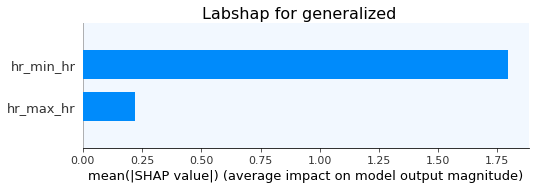

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from os.path import join as j
from os import listdir as ld
from sklearn import metrics
import xgboost as xgb
import pandas as pd
import numpy as np
import shap
import re
import os
os.system(f'find {Paths.get(Dirs.ROOT)} -name ".DS_Store" -delete')

pd.set_option("display.max_rows", None, "display.max_columns", None)


def extract_emails(_list):
  _reg = re.compile(r'([0-9a-z.]+@[0-9a-z.]+)')
  _elems = []
  for _p in _list:
    if _reg.search(_p):
      _email = _reg.search(_p).group(1)
      _elems += [(_email, _p)]
  return _elems


def train_test_generalized_xgboost(inp_dir, out_file, with_context=False):
    inputs = extract_emails(ld(inp_dir))
    inputs.sort(key=lambda x: x[0])
    m_rounds = len(inputs)

    feature_names = ['hr_min_hr', 'hr_max_hr', 'rr_mean_nni','rr_median_nni','rr_max_hr','rr_min_hr','rr_sdsd','rr_kurtosis','rr_skew','rr_p20','rr_p80','hr_mean_nni','hr_median_nni','hr_max_hr','hr_min_hr','hr_sdsd','hr_kurtosis','hr_skew','hr_p20','hr_p80']

    models = []
    x_tests = []

    best_thresholds = {}
    best_f1s = {}

    with open(out_file, "w+") as w, open(f'{out_file[:out_file.rindex(".csv")]}_granular.csv', 'w+') as w_granular:
        w.write('Balanced Accuracy,F1 score,ROC_AUC,TPR,TNR\n')
        w_granular.write('LOSO Subject,Balanced Accuracy,F1 score,ROC_AUC,TPR,TNR\n')
        all_scores = {'acc': [], 'f1': [], 'roc_auc': [], 'TPR': [], 'TNR': []}
        
        models = []
        x_tests = []

        for loso_idx in range(m_rounds):
            # region load test subject's dataset
            test_email, test_filename = inputs[loso_idx]
            # if test_email != 'david000914@gmail.com.csv':
            #   continue
            test_dataset = pd.read_csv(j(inp_dir, test_filename)).replace([np.inf, -np.inf], np.nan,).dropna(axis=0)

            if test_dataset.shape[0] < 2:
              continue

            x_test = test_dataset.iloc[:, :-1].copy()
            x_test = x_test[feature_names]
            y_test = test_dataset.iloc[:, -1].copy()
            y_test = y_test.astype(int)

            scores_1round = {'acc': [], 'f1': [], 'roc_auc': [], 'TPR': [], 'TNR': []}
            x_train, y_train, initialized = None, None, False

            print(f'{loso_idx+1}/{m_rounds} {test_email} participant is left out as test')

            for idx, tp in enumerate(inputs):
                if tp[0] == test_email:
                    continue
                train_dataset = pd.read_csv(j(inp_dir, tp[1])).replace([np.inf, -np.inf], np.nan).dropna(axis=0)
                _x_train = train_dataset.iloc[:, :-1].copy()
                _x_train = _x_train[feature_names]
                _y_train = train_dataset.iloc[:, -1].copy()
                _y_train = _y_train.astype(int)
                if _x_train.empty or _y_train.empty:
                    continue
                if initialized:
                    x_train = pd.concat([x_train, _x_train])
                    y_train = pd.concat([y_train, _y_train])
                else:
                    x_train = _x_train
                    y_train = _y_train
                    initialized = True

            # SMOTE
            try:
                # 'fit_resample' conducts over-sampling data in the minority class. Again, resampling should be only conducted in train set.
                x_train, y_train = SMOTE().fit_resample(x_train, y_train)
            except ValueError:
                continue
            
            # np arrays --> data frames
            x_train = pd.DataFrame(x_train, columns=x_train.columns)
            y_train = pd.Series(y_train)

            min_max_scaler = MinMaxScaler()
            # StandardScaler.fit() finds characteristics of data distribution (i.e., min, max) in train set.
            min_max_scaler.fit(x_train)
            # Transform numeric data within train and test set.
            x_train_scale = min_max_scaler.transform(x_train)
            x_test_scale = min_max_scaler.transform(x_test)
            # np arrays --> data frames
            x_train = pd.DataFrame(x_train_scale, index=x_train.index, columns=x_train.columns)
            x_test = pd.DataFrame(x_test_scale, index=x_test.index, columns=x_test.columns)

            # data frame --> xgboost.DMatrix
            d_train = xgb.DMatrix(data=x_train, label=y_train.to_numpy())
            d_test = xgb.DMatrix(data=x_test, label=y_test.to_numpy())
            # print(f'x_test size : {x_test.size}, y_test size : {y_test.size}')

            # skip if only one class exists
            if len(y_train.unique()) == 1 or len(y_test.unique()) == 1:
              print(f'error - participant {test_email} train classes are {y_train.unique()}, test classes are {y_test.unique()}')
              continue

            # params : https://xgboost.readthedocs.io/en/latest/parameter.html
            results = {}
            booster = xgb.train(
                params=dict(eval_metric='auc', booster='gbtree', verbosity=0, objective='binary:logistic'),
                dtrain=d_train,
                num_boost_round=1000,  # the number of boosted trees
                early_stopping_rounds=25,  # early stop generating trees when eval_metric is not improved
                evals=[(d_test, 'test')],  # evaluation set to check early stopping
                verbose_eval=False,
                evals_result=results
            )
            models += [booster]
            x_tests += [x_test]

            # [Plotting]
            # epochs = len(results['test']['auc'])
            # x_axis = range(0, epochs)
            # fig, ax = pyplot.subplots()
            # ax.plot(x_axis, results['train']['auc'], label='Train')
            # ax.plot(x_axis, results['test']['auc'], label='Test')
            # ax.legend()
            # pyplot.ylabel('AUC')
            # pyplot.title('XGBoost training plot')
            # pyplot.show()

            # predict() returns probability of a positive label (label == 1)
            y_pred = booster.predict(data=d_test, ntree_limit=booster.best_ntree_limit)

            # [predict() --> probability] cut-off as 0.5: positive label when a probability is higher than 0.5.
            
            best_threshold, max_f1 = None, 0
            for threshold in range(5, 90, 1):
              f1 = metrics.f1_score(y_test, np.where(y_pred > float(threshold)/100, 1, 0), average='macro')
              if f1 > max_f1:
                best_threshold = float(threshold)/100
                max_f1 = f1
            best_thresholds[test_email] = best_threshold
            best_f1s[test_email] = max_f1
            #print(y_test.to_numpy(), '\npred\n', y_pred)

            # region append to total score
            y_pred_class = np.where(y_pred > best_threshold, 1, 0)
            all_scores['acc'].append(metrics.balanced_accuracy_score(y_test, y_pred_class))
            all_scores['f1'].append(metrics.f1_score(y_test, y_pred_class, average='macro'))
            all_scores['roc_auc'].append(metrics.roc_auc_score(y_test, y_pred))
            all_scores['TPR'].append(metrics.recall_score(y_test, y_pred_class))
            all_scores['TNR'].append(metrics.recall_score(y_test, y_pred_class, pos_label=0))
            # endregion
            # region append to local (round) score
            scores_1round['acc'].append(metrics.balanced_accuracy_score(y_test, y_pred_class))
            scores_1round['f1'].append(metrics.f1_score(y_test, y_pred_class, average='macro'))
            scores_1round['roc_auc'].append(metrics.roc_auc_score(y_test, y_pred))
            scores_1round['TPR'].append(metrics.recall_score(y_test, y_pred_class))
            scores_1round['TNR'].append(metrics.recall_score(y_test, y_pred_class, pos_label=0))
            # endregion
            # conf_mtx += metrics.confusion_matrix(y_test, y_pred_class)
            # xgb_models.append(booster)

            w_granular.write(f'{test_email},{np.mean(scores_1round["acc"])},{np.mean(scores_1round["f1"])},{np.mean(scores_1round["roc_auc"])},{np.mean(scores_1round["TPR"])},{np.mean(scores_1round["TNR"])}\n')
        w.write(f'{np.mean(all_scores["acc"])},{np.mean(all_scores["f1"])},{np.mean(all_scores["roc_auc"])},{np.mean(all_scores["TPR"])},{np.mean(all_scores["TNR"])}\n')
        
        keys = list(best_f1s.keys())
        keys.sort()
        for participant in keys:
          print(f'{participant}, {best_f1s[participant]}, {best_thresholds[participant]}')

        # plot shap
        shap_values = []
        test_features = []
        for model, x_test in zip(models, x_tests):
            explainer = shap.TreeExplainer(booster)
            shap_value = explainer.shap_values(x_test)
            shap_values.append(shap_value)
            test_features.append(x_test)
        shap_values = np.vstack(shap_values)
        test_features = pd.concat(test_features, axis=0)
        fig = plt.figure()
        fig.suptitle(f'Labshap for generalized', fontsize=16)
        plt.rcParams['axes.facecolor'] = '#f2f8ff'
        # plt.xlim(-6, 6)
        shap.summary_plot(shap_values, test_features, show=False, plot_type='bar')
        fig.savefig(Paths.get(Dirs.RESULTS_ROOT,'fieldshap-generalized.svg'), format='svg')
        # plt.show()

# # lab stress
# train_test_generalized_xgboost(Paths.get(Dirs.FEATURES_LAB_STRESS), Paths.get(Files.RESULTS_G_LAB_STRESS))

# field stress
train_test_generalized_xgboost(Paths.get(Dirs.FEATURES_FIELD), Paths.get(Files.RESULTS_G_FIELD_STRESS))

## 2.5. Personalized model building

# 3. Evaluation

## 3.1. Performance

## 3.2. Data yield

## 3.3. Model explanation via SHAP